In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("student.csv")

In [3]:
# Check if the required column for transformation is binary or not
column_to_convert = ["school", "address", "sex", "famsize", "Pstatus", "schoolsup", 
                     "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]
column_data_type = {
    var : {
        "Unique": (data[var].unique()).tolist()
    } for var in column_to_convert
}
column_data_type

{'school': {'Unique': ['GP', 'MS']},
 'address': {'Unique': ['U', 'R']},
 'sex': {'Unique': ['F', 'M']},
 'famsize': {'Unique': ['GT3', 'LE3']},
 'Pstatus': {'Unique': ['A', 'T']},
 'schoolsup': {'Unique': ['yes', 'no']},
 'famsup': {'Unique': ['no', 'yes']},
 'paid': {'Unique': ['no', 'yes']},
 'activities': {'Unique': ['no', 'yes']},
 'nursery': {'Unique': ['yes', 'no']},
 'higher': {'Unique': ['yes', 'no']},
 'internet': {'Unique': ['no', 'yes']},
 'romantic': {'Unique': ['no', 'yes']}}

In [4]:
# Part 1.
# Question 1
# Create column for school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet and romantic based on binary data
data["binary_school"] = [(lambda school: 0 if school == "GP" else 1 )(school) for school in data["school"]]
data["binary_sex"] = [(lambda sex: 0 if sex == "F" else 1)(sex) for sex in data["sex"]]
data["binary_address"] = [(lambda address: 0 if address == "U" else 1)(address) for address in data["address"]]
data["binary_famsize"] = [(lambda famsize: 0 if famsize == "LE3" else 1 )(famsize) for famsize in data["famsize"]]
data["binary_Pstatus"] = [(lambda Pstatus: 0 if Pstatus == "T" else 1)(Pstatus) for Pstatus in data["Pstatus"]]
data["binary_schoolsup"] = [(lambda schoolsup: 0 if schoolsup == "no" else 1)(schoolsup) for schoolsup in data["schoolsup"]]
data["binary_famsup"] = [(lambda famsup: 0 if famsup == "no" else 1)(famsup) for famsup in data["famsup"]]
data["binary_paid"] = [(lambda paid: 0 if paid == "no" else 1)(paid) for paid in data["paid"]]
data["binary_activities"] = [(lambda activities: 0 if activities == "no" else 1)(activities) for activities in data["activities"]]
data["binary_nursery"] = [(lambda nursery: 0 if nursery == "no" else 1)(nursery) for nursery in data["nursery"]]
data["binary_higher"] = [(lambda higher: 0 if higher == "no" else 1)(higher) for higher in data["higher"]]
data["binary_internet"] = [(lambda internet: 0 if internet == "no" else 1)(internet) for internet in data["internet"]]
data["binary_romantic"] = [(lambda romantic: 0 if romantic == "no" else 1)(romantic) for romantic in data["romantic"]]
data[["school", "binary_school", "sex", "binary_sex", "address", "binary_address", "famsize", "binary_famsize",
    "Pstatus", "binary_Pstatus", "schoolsup", "binary_schoolsup", "famsup", "binary_famsup", "paid", "binary_paid",
     "activities", "binary_activities", "nursery", "binary_nursery", "higher", "binary_higher", "internet", 
     "binary_internet", "romantic", "binary_romantic"]].tail(10)

,school,binary_school,sex,binary_sex,address,binary_address,famsize,binary_famsize,Pstatus,binary_Pstatus,...,activities,binary_activities,nursery,binary_nursery,higher,binary_higher,internet,binary_internet,romantic,binary_romantic
385,MS,1,F,0,R,1,GT3,1,T,0,...,no,0,yes,1,yes,1,no,0,no,0
386,MS,1,F,0,R,1,GT3,1,T,0,...,yes,1,yes,1,yes,1,yes,1,yes,1
387,MS,1,F,0,R,1,GT3,1,T,0,...,yes,1,no,0,yes,1,yes,1,no,0
388,MS,1,F,0,U,0,LE3,0,T,0,...,no,0,yes,1,yes,1,yes,1,no,0
389,MS,1,F,0,U,0,GT3,1,T,0,...,yes,1,yes,1,yes,1,no,0,no,0
390,MS,1,M,1,U,0,LE3,0,A,1,...,no,0,yes,1,yes,1,no,0,no,0
391,MS,1,M,1,U,0,LE3,0,T,0,...,no,0,no,0,yes,1,yes,1,no,0
392,MS,1,M,1,R,1,GT3,1,T,0,...,no,0,no,0,yes,1,no,0,no,0
393,MS,1,M,1,R,1,LE3,0,T,0,...,no,0,no,0,yes,1,yes,1,no,0
394,MS,1,M,1,U,0,LE3,0,T,0,...,no,0,yes,1,yes,1,yes,1,no,0


In [5]:
ax = [(lambda x: x)(x) for x in data["health"].unique()]
ax

['good', 'excellent', 'very bad', 'bad', 'very good']

In [6]:
# Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, famrel, freetime, gout, Dalc, Walc 
# and health into ordinal numbers based on number of cases in the data set (create new columns without 
# overwriting the existing ones).


def transform_str_ordinal(value):
    if value.upper() == "VERY LOW" or value.upper() == "VERY BAD" or value.upper() == "NONE" or value.upper() == "AT_HOME":
        return 0
    elif value.upper() == "LOW" or value.upper() == "BAD" or value.lower() == "primary education (4th grade)" or value.upper() == "HEALTH":
        return 1
    elif value.upper() == "MEDIUM" or value.upper() == "GOOD" or value.lower() == "5th to 9th grade" or value.upper() == "SERVICES":
        return 2
    elif value.upper() == "HIGH" or value.upper() == "VERY GOOD" or value.lower() == "secondary education" or value.upper() == "TEACHER":
        return 3
    else:
        return 4

def transform_time_ordinal(value):
    if value.lower() == "<15 min." or value.lower() == "<2 hours":
        return 0
    elif value.lower() == "15 to 30 min." or value.lower() == "2 to 5 hours":
        return 1
    elif value.lower() == "30 min. to 1 hour" or value.lower() == "5 to 10 hours":
        return 2
    else:
        return 3
    
data["ordinal_Medu"] = [(lambda medu: transform_str_ordinal(medu))(medu) for medu in data["Medu"]]
data["ordinal_Fedu"] = [(lambda medu: transform_str_ordinal(fedu))(fedu) for fedu in data["Fedu"]]
data["ordinal_Mjob"] = [(lambda mjob: transform_str_ordinal(mjob))(mjob) for mjob in data["Mjob"]]
data["ordinal_Fjob"] = [(lambda fjob: transform_str_ordinal(fjob))(fjob) for fjob in data["Fjob"]]
data["ordinal_reason"] = [(lambda reason: 0 if reason.upper() == "HOME" else 
                           (1 if reason.upper() == "REPUTATION" else 
                            (2 if reason.upper() == "COURSE"  else 3)))(reason) for reason in data["reason"]]
data["ordinal_guardian"] = [(lambda guardian: 0 if guardian.upper() == "MOTHER" else 
                           (1 if guardian.upper() == "FATHER" else 2))(guardian) for guardian in data["guardian"]]
data["ordinal_traveltime"] = [(lambda traveltime: transform_time_ordinal(traveltime))(traveltime) for traveltime in data["traveltime"]]
data["ordinal_studytime"] = [(lambda studytime: transform_time_ordinal(studytime))(studytime) for studytime in data["studytime"]]
data["ordinal_famrel"] = [(lambda famrel: transform_str_ordinal(famrel))(famrel) for famrel in data["famrel"]]
data["ordinal_freetime"] = [(lambda freetime: transform_str_ordinal(freetime))(freetime) for freetime in data["freetime"]]
data["ordinal_goout"] = [(lambda goout: transform_str_ordinal(goout))(goout) for goout in data["goout"]]
data["ordinal_Dalc"] = [(lambda dalc: transform_str_ordinal(dalc))(dalc) for dalc in data["Dalc"]]
data["ordinal_Walc"] = [(lambda walc: transform_str_ordinal(walc))(walc) for walc in data["Walc"]]
data["ordinal_health"] = [(lambda health: transform_str_ordinal(health))(health) for health in data["health"]]

data[["ordinal_Medu","ordinal_Fedu", "ordinal_Mjob", "ordinal_Fjob", 
      "ordinal_reason", "ordinal_guardian", "ordinal_traveltime", 
     "ordinal_studytime", "ordinal_famrel", "ordinal_freetime",
     "ordinal_goout", "ordinal_Dalc", "ordinal_Walc", "ordinal_health"]].tail(10)

,ordinal_Medu,ordinal_Fedu,ordinal_Mjob,ordinal_Fjob,ordinal_reason,ordinal_guardian,ordinal_traveltime,ordinal_studytime,ordinal_famrel,ordinal_freetime,ordinal_goout,ordinal_Dalc,ordinal_Walc,ordinal_health
385,2,2,0,4,3,0,1,2,4,2,2,0,2,3
386,4,4,3,0,1,0,2,0,3,3,2,1,1,4
387,2,3,2,4,2,0,0,2,4,3,1,0,1,4
388,3,1,3,2,2,0,0,1,3,2,3,0,0,0
389,1,1,4,4,2,0,1,1,0,0,0,0,0,4
390,2,2,2,2,2,2,0,1,4,4,3,3,4,3
391,3,1,2,2,2,0,1,0,1,3,4,2,3,1
392,1,1,4,4,2,2,0,0,4,4,2,2,2,2
393,3,2,2,4,2,0,2,0,3,3,0,2,3,4
394,1,1,4,0,2,1,0,0,2,1,2,2,2,4


In [7]:
# create a new column named age_category whose values should be based on the values in the age column, divide the values into 3
# ordinal numbers; 0 – 15 to 17, 1 – 18 to 20, 2 – 21 and over
data["age_category"] = [(lambda age_category: 0 if age_category >= 15 and age_category <= 17 else (
    1 if (age_category >= 18 and age_category <= 20) else 2))(age_category) for age_category in data["age"]]
data[["age", "age_category"]].tail(10)

,age,age_category
385,18,1
386,18,1
387,19,1
388,18,1
389,18,1
390,20,1
391,17,0
392,21,2
393,18,1
394,19,1


In [8]:
# create a new column named passed (yes or no) whose values
# should be based on the values present in the G3 column (>=8 –
# yes, <8 – no)
data["passed"] = [(lambda G3: "yes" if G3 >= 8 else "no")(G3) for G3 in data["G3"]]
data[["G3", "passed"]].tail(10)

,G3,passed
385,10,yes
386,6,no
387,0,no
388,8,yes
389,0,no
390,9,yes
391,16,yes
392,7,no
393,10,yes
394,9,yes


In [9]:
# Write code to show the summary statistics (sum, mean, median,
# standard deviation, max and min) of the variables age, absences, G1,
# G2 and G3.
summary_variable = ["age", "absences", "G1", "G2", "G3"]
summary_statics = {var: { 
                          "sum": data[var].sum(), 
                          "mean": data[var].mean(), 
                          "median": data[var].median(), 
                          "deviation": data[var].std()
                         } for var in summary_variable }
summary_statics

{'age': {'sum': 6595,
  'mean': 16.696202531645568,
  'median': 17.0,
  'deviation': 1.2760427246056283},
 'absences': {'sum': 2255,
  'mean': 5.708860759493671,
  'median': 4.0,
  'deviation': 8.00309568710818},
 'G1': {'sum': 4309,
  'mean': 10.90886075949367,
  'median': 11.0,
  'deviation': 3.319194671507669},
 'G2': {'sum': 4232,
  'mean': 10.713924050632912,
  'median': 11.0,
  'deviation': 3.7615046595560298},
 'G3': {'sum': 4114,
  'mean': 10.415189873417722,
  'median': 11.0,
  'deviation': 4.5814426109978434}}

<AxesSubplot:>

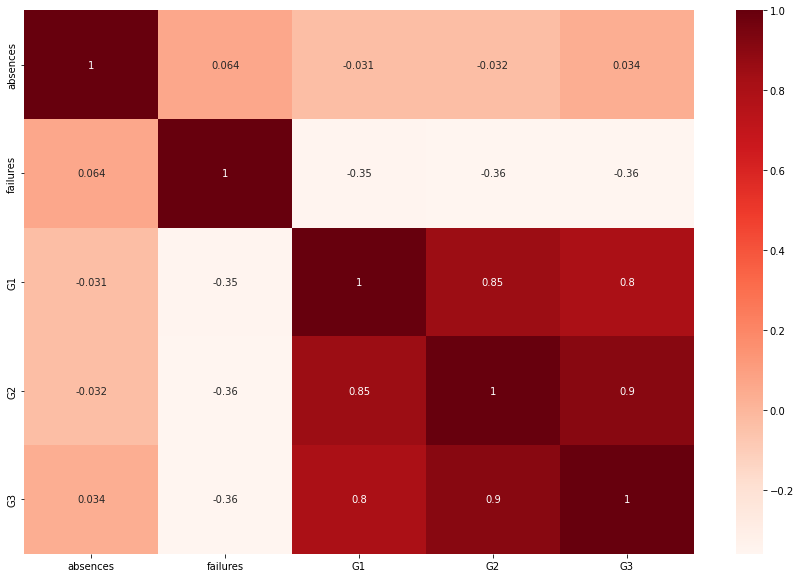

In [10]:
# Write code to calculate and show the correlation between the variables
# absences, failures, G1, G2 and G3. Present the result using a
# heatmap and interpret the results.
failure_corr = data[['absences','failures', 'G1', 'G2', 'G3']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(failure_corr, annot=True, cmap="Reds")

<AxesSubplot:xlabel='age', ylabel='Count'>

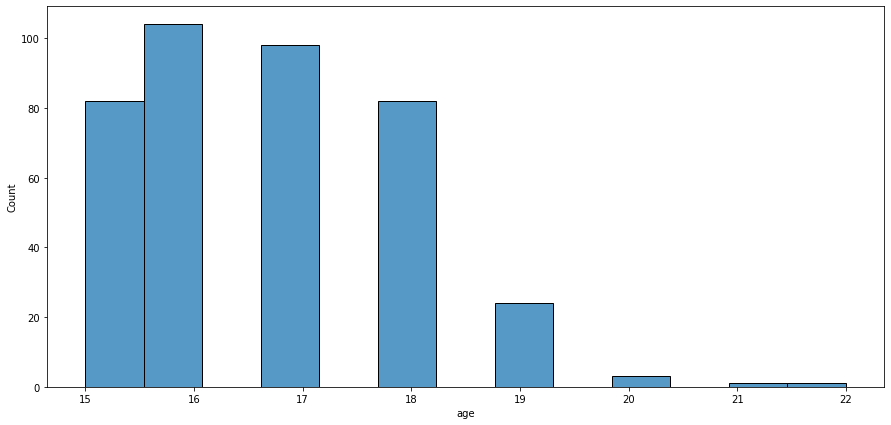

In [11]:
# Write code to show histogram plots and boxplots to visualize the
# distribution of the variables age, absences and G3. Interpret the
# results and comment about the distribution of each variable.
plt.figure(figsize=(15,7))
sns.histplot(data["age"], kde=False)

<AxesSubplot:xlabel='age'>

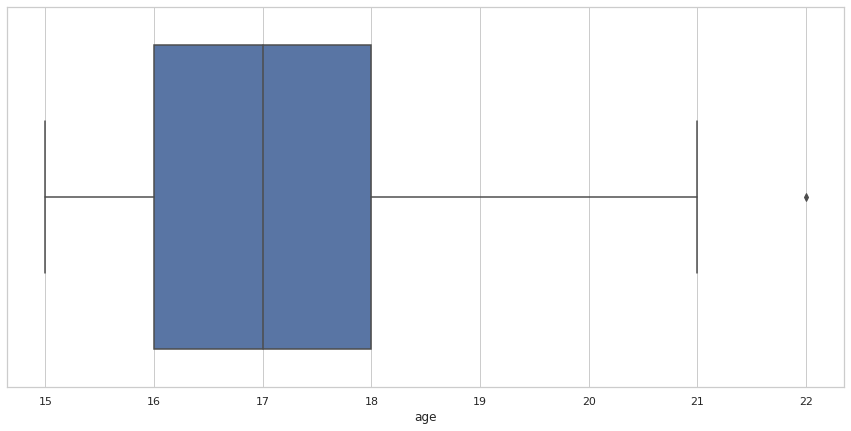

In [12]:
# Boxplot of age
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
sns.boxplot(x=data["age"])

<AxesSubplot:xlabel='absences', ylabel='Count'>

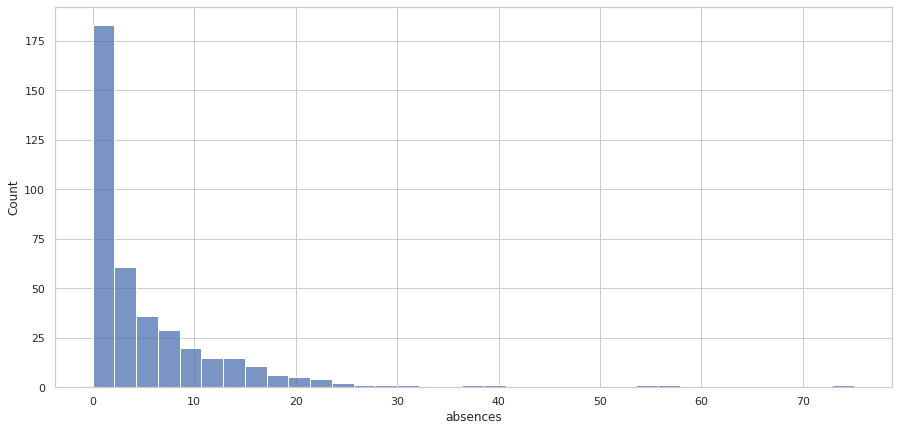

In [13]:
# Histogram for Absences
plt.figure(figsize=(15,7))
sns.set_theme(style="whitegrid")
sns.histplot(data["absences"], kde=False)

<AxesSubplot:xlabel='absences'>

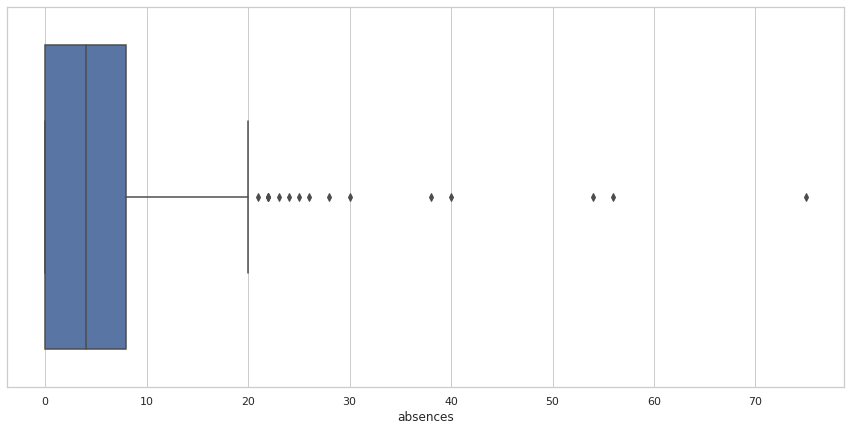

In [14]:
# Boxplot for Absences
plt.figure(figsize=(15,7))
sns.boxplot(x=data["absences"])

<AxesSubplot:xlabel='G3', ylabel='Count'>

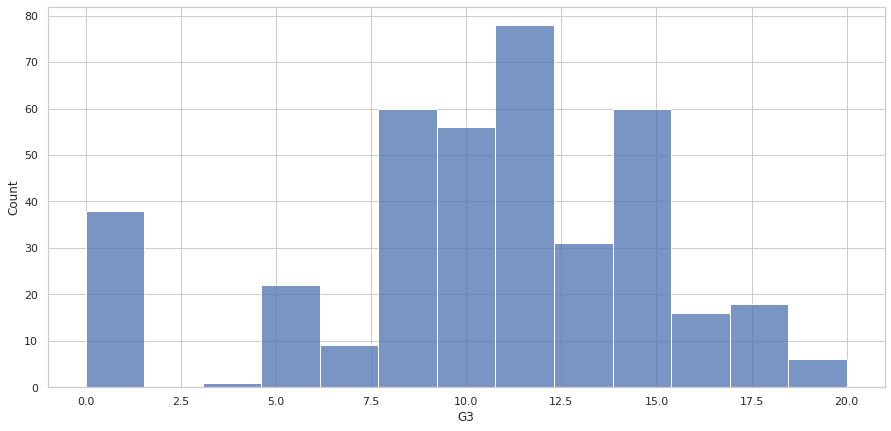

In [15]:
# Histogram for G3
plt.figure(figsize=(15,7))
sns.histplot(data["G3"], kde=False)

<AxesSubplot:xlabel='G3'>

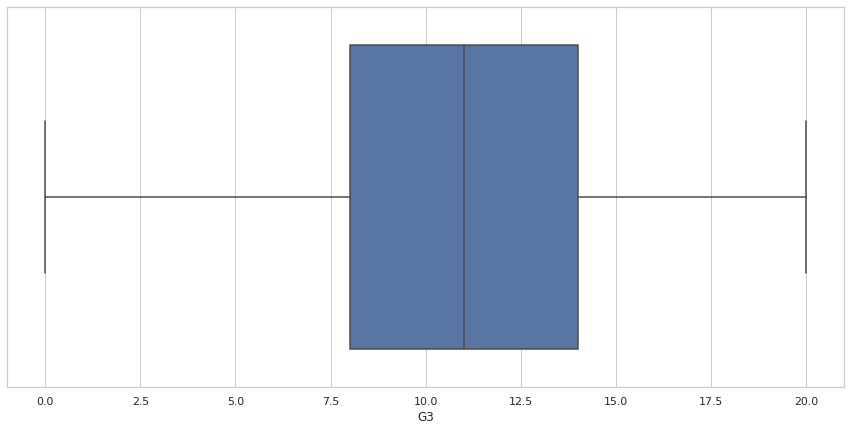

In [16]:
# Boxplot for G3
plt.figure(figsize=(15,7))
sns.boxplot(x=data["G3"])

Text(0.5, 1.0, 'Student group by school who have passed the exam')

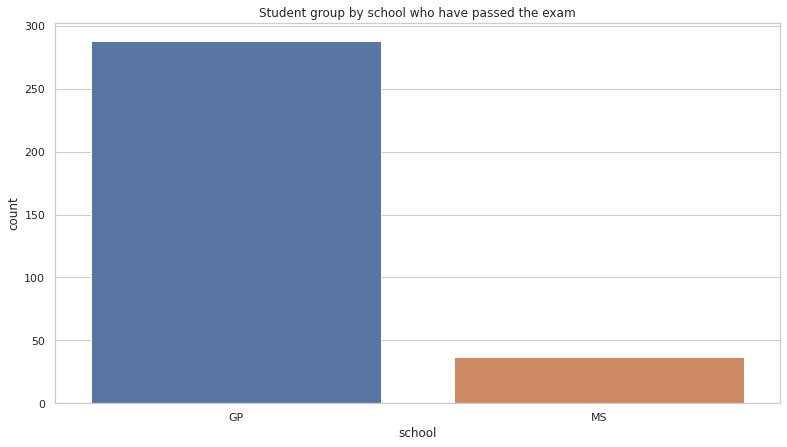

In [17]:
# Write code to show a bar graph of the total number of students who
# passed the final term grouped according to the school that they belong
# to. Use proper labels in the graph and interpret the results.
plt.figure(figsize=(13,7))
graph = sns.countplot(x="school", data=data[data["passed"]=="yes"])
graph.set_title("Student group by school who have passed the exam")

Text(0.5, 1.0, 'Student group by studytime who have failed the exam')

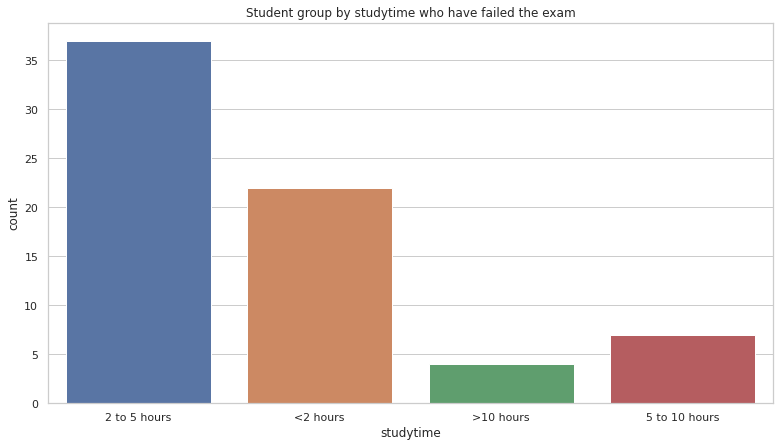

In [18]:
# Write code to show a bar graph of the total number of students who
# failed the final term grouped according to their weekly study time. Use
# proper labels in the graph and interpret the results.
plt.figure(figsize=(13,7))
graph = sns.countplot(x="studytime", data=data[data["passed"]=="no"])
graph.set_title("Student group by studytime who have failed the exam")

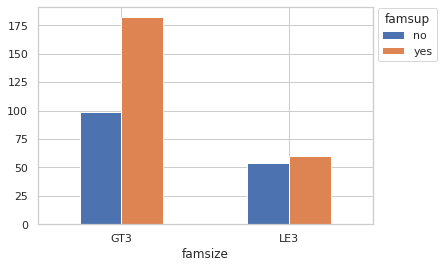

In [24]:
# data["parents"] = data["guardian"].isin(["father", "mother"])
ct = pd.crosstab(data["famsize"], data["famsup"])
ax = ct.plot(kind='bar', stacked=False, rot=0)
sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')

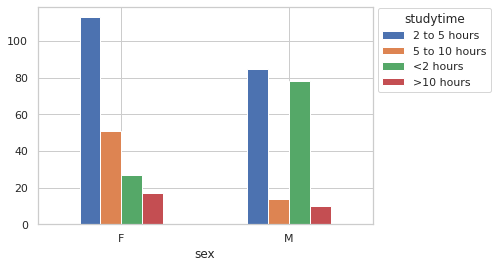

In [23]:
# Study time of the student and it's relation to the gender.
ct = pd.crosstab(data["sex"], data["studytime"])
ax = ct.plot(kind='bar', stacked=False, rot=0)
sns.move_legend(ax, bbox_to_anchor=(1,1.02), loc='upper left')

<Figure size 936x504 with 0 Axes>

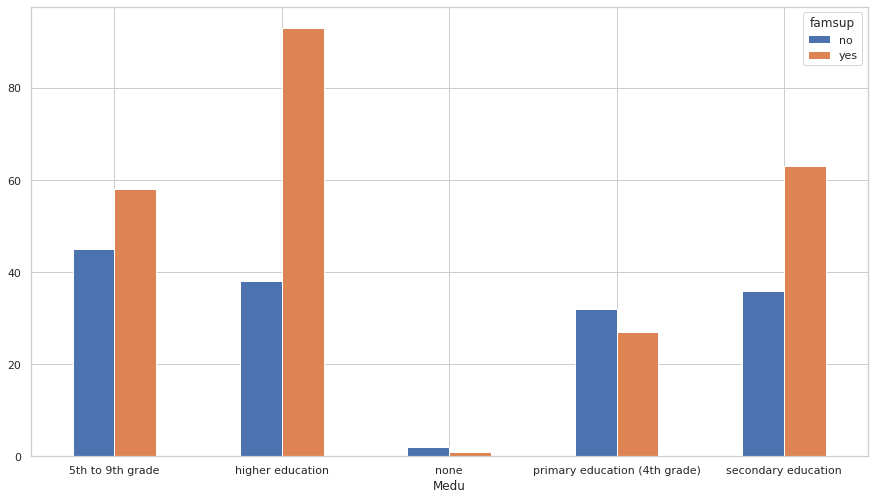

In [47]:
# Mother education effect on the student
dims = (15, 8.27)
ct = pd.crosstab(data["Medu"], data["famsup"])
plt.figure(figsize=(13,7))
ax = ct.plot(kind='bar', stacked=False, rot=0, figsize=dims)

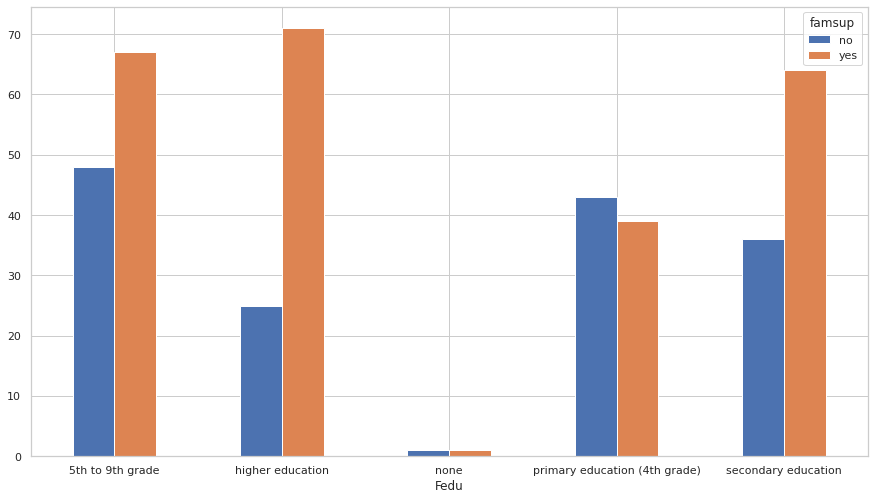

In [50]:
# Father education effect on the student
dims = (15, 8.27)
ct = pd.crosstab(data["Fedu"], data["famsup"])
ax = ct.plot(kind='bar', stacked=False, rot=0, figsize=dims)

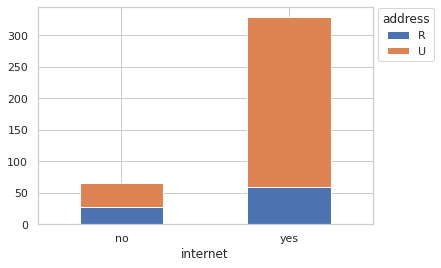

In [54]:
# Impact of internet to the student study and it's relation to the
# Area student living
ct = pd.crosstab(data["internet"], data["address"])
ax = ct.plot(kind='bar', stacked=True, rot=0)
sns.move_legend(ax, bbox_to_anchor=(1,1.02), loc='upper left')

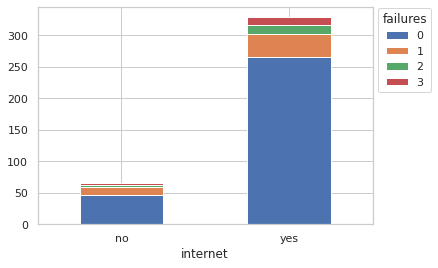

In [55]:
# Impact of internet to the student study and it's relation to the
# Area student living
ct = pd.crosstab(data["internet"], data["failures"])
ax = ct.plot(kind='bar', stacked=True, rot=0)
sns.move_legend(ax, bbox_to_anchor=(1,1.02), loc='upper left')